# 1. Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing Data

In [8]:
# Importing data set zomato_cleaned.csv
df_zomato_cleaned = pd.read_csv(r'/Users/.../Documents/Zomato Analysis/02 - Data/Prepared Data/zomato_cleaned.csv', index_col = False)

In [10]:
df_zomato_cleaned.head()

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost_2ppl,reviews_list,menu_item,listed_as_type,listed_in_city,rate_float
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8


# 3. Wrangling & Cleaning Data

In [13]:
# create the subset df_zomato_subset
df_zomato_subset = df_zomato_cleaned[
    [
        "name",
        "rate_float",
        "votes",
        "approx_cost_2ppl",
        "location",
        "listed_in_city",
        "listed_as_type",
        "rest_type",
        "book_table",
        "online_order",
        "cuisines",
    ]
].copy()

In [15]:
df_zomato_subset.head()

,name,rate_float,votes,approx_cost_2ppl,location,listed_in_city,listed_as_type,rest_type,book_table,online_order,cuisines
0,Jalsa,4.1,775,800,Banashankari,Banashankari,Buffet,Casual Dining,Yes,Yes,"North Indian, Mughlai, Chinese"
1,Spice Elephant,4.1,787,800,Banashankari,Banashankari,Buffet,Casual Dining,No,Yes,"Chinese, North Indian, Thai"
2,San Churro Cafe,3.8,918,800,Banashankari,Banashankari,Buffet,"Cafe, Casual Dining",No,Yes,"Cafe, Mexican, Italian"
3,Addhuri Udupi Bhojana,3.7,88,300,Banashankari,Banashankari,Buffet,Quick Bites,No,No,"South Indian, North Indian"
4,Grand Village,3.8,166,600,Basavanagudi,Banashankari,Buffet,Casual Dining,No,No,"North Indian, Rajasthani"


In [17]:
df_zomato_subset.shape

(51148, 11)

In [21]:
# rename column rate_float
df_zomato_subset.rename(columns={"rate_float": "rate"}, inplace=True)

In [23]:
df_zomato_subset.head()

,name,rate,votes,approx_cost_2ppl,location,listed_in_city,listed_as_type,rest_type,book_table,online_order,cuisines
0,Jalsa,4.1,775,800,Banashankari,Banashankari,Buffet,Casual Dining,Yes,Yes,"North Indian, Mughlai, Chinese"
1,Spice Elephant,4.1,787,800,Banashankari,Banashankari,Buffet,Casual Dining,No,Yes,"Chinese, North Indian, Thai"
2,San Churro Cafe,3.8,918,800,Banashankari,Banashankari,Buffet,"Cafe, Casual Dining",No,Yes,"Cafe, Mexican, Italian"
3,Addhuri Udupi Bhojana,3.7,88,300,Banashankari,Banashankari,Buffet,Quick Bites,No,No,"South Indian, North Indian"
4,Grand Village,3.8,166,600,Basavanagudi,Banashankari,Buffet,Casual Dining,No,No,"North Indian, Rajasthani"


# 4. Data Visualization

## 4.1 Correlation Matrix

In [29]:
# Create a correlation matrix using pandas for numeric columns in df_zomato_subset

df_zomato_subset.select_dtypes(include=['number']).corr()

,rate,votes,approx_cost_2ppl
rate,1.000000,0.428863,0.366485
votes,0.428863,1.000000,0.381695
approx_cost_2ppl,0.366485,0.381695,1.000000


This correlation matrix presents the relationships between `rate`, `votes`, and `approx_cost_2ppl`
Correlation values range from -1 to 1, where:
- 1 indicates a perfect positive correlation,
- -1 indicates a perfect negative correlation,
- 0 indicates no correlation.

#### Interpretation:

1. **Rate and Votes (0.428863):** There is a moderate positive correlation (approximately 0.43) between the rating and the number of votes a restaurant receives. This suggests that restaurants with higher ratings tend to also get more votes, although this relationship is not extremely strong.

2. **Rate and Approx Cost for 2 People (0.366485):** There is a slight to moderate positive correlation (approximately 0.37) between the restaurant's rating and the approximate cost for two people. This indicates that higher-rated restaurants tend to be slightly more expensive but the correlation is not strong.

3. **Votes and Approx Cost for 2 People (0.381695):** There is a slight to moderate positive correlation (approximately 0.38) between the number of votes and the approximate cost for two people. This suggests that pricier restaurants may receive more votes, though again, the relationship is not very strong.

Overall, the matrix suggests moderate positive relationships between all variables, but none are highly correlated, indicating other factors likely play a significant role in their relationships.

In [34]:
# create the subset with numeric columns only
df_zomato_numeric = df_zomato_subset[
    [
        "rate",
        "votes",
        "approx_cost_2ppl",
    ]
].copy()

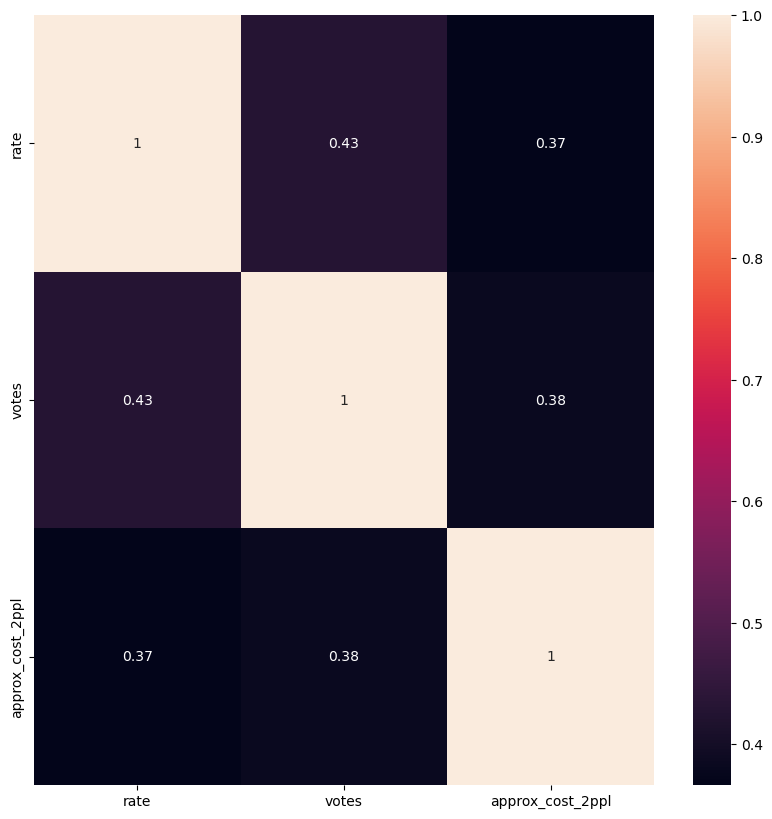

In [36]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_zomato_numeric.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

This heatmap visualizes the correlation matrix for `rate`, `votes`, and `approx_cost_2ppl`

#### Interpretation

1. **Color Gradient:**
   - The color gradient ranges from dark purple, representing low or negative correlations, to light beige, representing high correlations (close to 1). In this heatmap, all present values are positive, as negative correlations are not shown.

2. **Diagonal Elements:**
   - The diagonal elements are all 1, which is expected since they represent the correlation of each variable with itself.

3. **Correlation Values and Interpretation:**
   - **Rate and Votes (0.43):** The color for this correlation is a medium-dark color, reflecting a moderate positive correlation. This implies that as the restaurant's rating increases, there tends to be a moderate increase in the number of votes, although the relationship is not very strong.
   
   - **Rate and Approx Cost for 2 People (0.37):** This value is reflected with a slightly less intense shade, indicating a slightly weaker correlation compared to `rate` vs. `votes`. This means that as the restaurant's rate increases, there is only a slight tendency for its cost for two people to increase.

   - **Votes and Approx Cost for 2 People (0.38):** This has a similar shade to the `rate` vs `approx_cost_2ppl`, depicting a slight to moderate positive correlation. This suggests a comparable relationship strength with that of `rate` vs `approx_cost_2ppl`.

#### Summary

The heatmap provides a quick visual way to understand that all the variable pairs in this dataset exhibit moderate positive correlations, with none being strongly positive or negative. The overall shades convey that while there are some relationships between the variables, they are not particularly strong or distinct.

## 4.2 Scatterplot

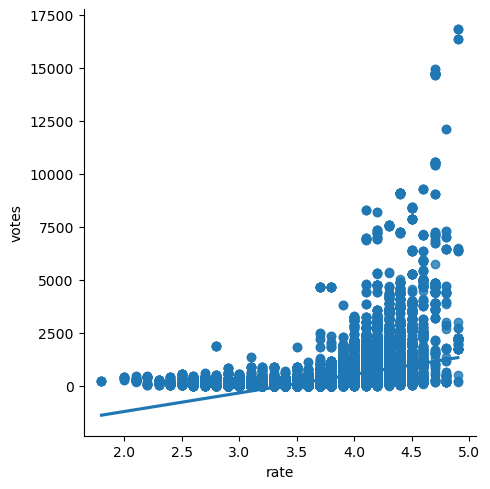

In [41]:
# Create a scatterplot for the "rate" and "votes" columns in seaborn

sns.lmplot(x = 'rate', y = 'votes', data = df_zomato_numeric)

This scatterplot visualizes the relationship between the `rate` and `votes` variables

#### Interpretation

1. **General Trend:**
   - There is a visible upward trend, indicating a positive correlation between `rate` and `votes`. As the rating increases, the number of votes tends to increase. This aligns with the moderate positive correlation observed in the correlation matrix (approximately 0.43).

2. **Data Distribution:**
   - Most data points cluster around ratings between 3.0 and 4.5. A notable number of restaurants have received relatively few votes, while a few have a significantly higher number of votes.

3. **Outliers:**
   - There are outlier points, especially noticeable in the upper right corner of the plot, where some restaurants with high ratings (close to 5) have received a large number of votes (up to 17,500). These points could represent particularly popular restaurants.

4. **Density of Points:**
   - The density of points is higher near ratings of 3.5 to 4.5. This suggests that most restaurants tend to have average to above-average ratings and a moderate amount of votes.

5. **Linear Trend Line:**
   - The plot includes a linear regression line through the points, illustrating the overall direction of this relationship. It indicates the slight upward slope of the correlation, suggesting that restaurants' ratings have a modest positive association with the number of votes they receive.

#### Summary

Overall, the scatterplot suggests that while there is a general positive relationship between the number of votes a restaurant receives and its rating, the scatter and few outliers indicate that this relationship is not perfect and other factors may influence voting behavior.

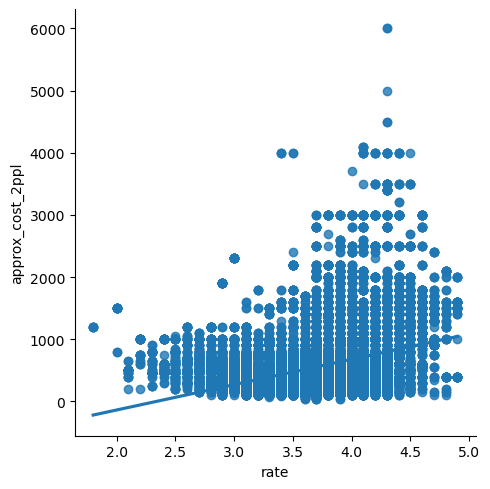

In [44]:
# Create a scatterplot for the "rate" and "approx_cost_2ppl" columns in seaborn

sns.lmplot(x = 'rate', y = 'approx_cost_2ppl', data = df_zomato_numeric)

This scatterplot visualizes the relationship between the `rate` and `approx_cost_2ppl` (approximate cost for 2 people)

#### Interpretation

1. **General Trend:**
   - There is a slight upward trend, indicating a weak positive correlation between `rate` and `approx_cost_2ppl`. As ratings increase, there is a mild tendency for the cost for two people to also increase. This corresponds to the moderate positive correlation of approximately 0.37 observed in the correlation matrix.

2. **Data Distribution:**
   - There is a dense clustering of points for ratings between 3.0 and 4.5. The majority of these points have approximate costs for two people ranging from 0 to 2000, suggesting many restaurants fall within this cost range and rating band.

3. **Outliers:**
   - Some outliers are noticeable, particularly above 4000 in `approx_cost_2ppl`, indicating a few restaurants have much higher costs. These outliers could represent high-end or luxury dining establishments.

4. **Density of Points:**
   - Many data points near the lower end of the cost spectrum (below 2000). This likely indicates that most restaurants do not charge excessively high prices for two people, regardless of their rating.

5. **Linear Trend Line:**
   - The plot includes a linear regression line, which illustrates the slight upward slope and the overall weak positive relationship between the restaurant ratings and the cost for two people.

#### Summary

Overall, the scatterplot suggests that although higher-rated restaurants tend to have slightly higher costs for two people, the relationship is not strong. Many other factors likely influence the pricing of a restaurant, and the correlation between rating and cost is only a small part of the picture.

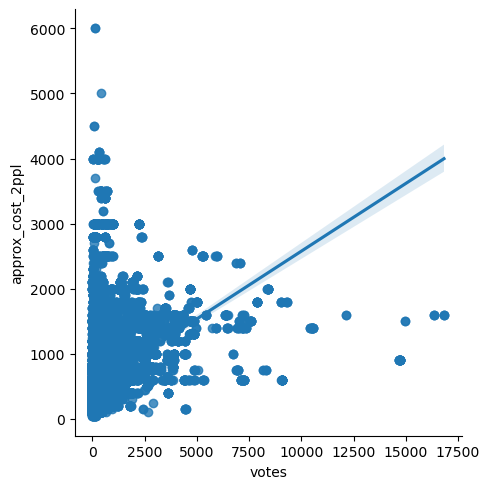

In [47]:
# Create a scatterplot for the "votes" and "approx_cost_2ppl" columns in seaborn

sns.lmplot(x = 'votes', y = 'approx_cost_2ppl', data = df_zomato_numeric)

This scatterplot visualizes the relationship between the `votes` and `approx_cost_2ppl` (approximate cost for two people)

#### Interpretation

1. **General Trend:**
   - The plot shows an upward trend with a positive slope, indicating a slight positive correlation between the number of votes a restaurant receives and the approximate cost for two people. As the number of votes increases, there is a tendency for costs to be higher, which aligns with the moderate positive correlation (around 0.38) observed in the correlation matrix.

2. **Data Distribution:**
   - Many data points cluster around restaurants with fewer votes, up to approximately 2500 votes, where the cost generally remains below 2000. This suggests a concentration of restaurants that are moderately priced and not excessively voted on.

3. **Outliers:**
   - Some outlier points are visible, particularly those receiving a very high number of votes (above 7500 votes) and have costs above 2000. These may represent popular high-end restaurants.

4. **Density of Points:**
   - The density is higher in the lower cost range, under 1000, regardless of the number of votes. This indicates that many restaurants are affordable, irrespective of vote count differences.

5. **Linear Trend Line:**
   - The linear regression line indicates the positive relationship, with the shaded area representing the confidence interval. This communicates a slight rise in cost as the number of votes increases.

#### Summary
                                                                                                                                                                                                                                           
Overall, the scatterplot suggests that restaurants receiving more votes tend to have slightly higher prices, although this relationship is not exceptionally strong. Most restaurants are affordable and receive between low and moderate vote totals, suggesting diverse factors influencing voting beyond just cost.

## 4.3 Pair Plot

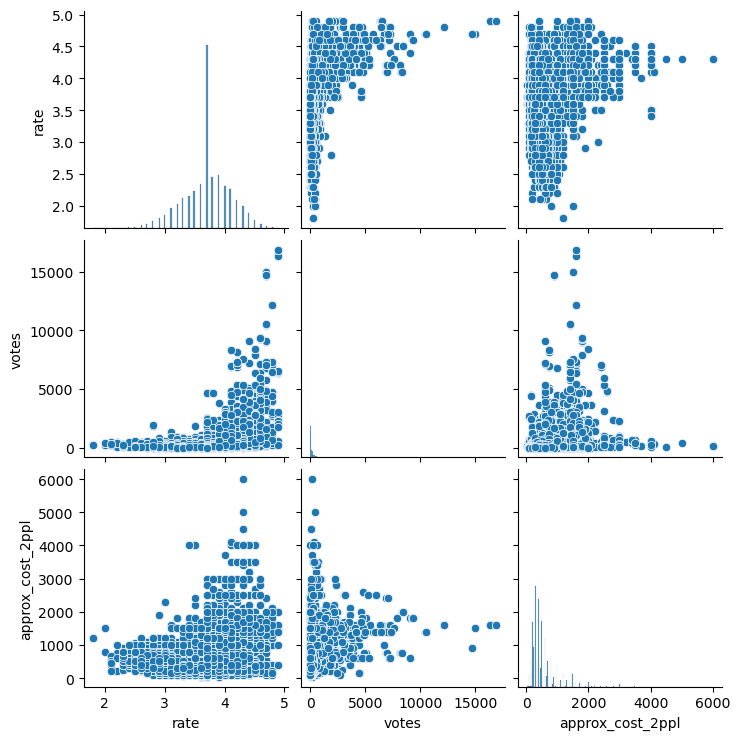

In [52]:
# Create a pair plot 

g = sns.pairplot(df_zomato_numeric)

This pair plot provides a visual overview of the relationships between the 3 numeric variables: `rate`, `votes`, and `approx_cost_2ppl`. It shows both scatterplots and univariate distributions (histograms) for each variable. 

#### Interpretation

1. **Diagonal Elements (Histograms):**
   - **Rate:** The distribution of ratings is skewed towards higher values, generally centered around ratings of 3.5 to 4.0. This suggests that many restaurants receive above-average ratings.
   - **Votes:** The histogram is highly skewed to the right with a significant number of restaurants receiving fewer votes and a small number receiving a very high amount (up to 17,500).
   - **Approx Cost for 2 People:** The distribution is also skewed to the right, with many restaurants having moderate costs and a few with high costs (up to 6,000).

2. **Off-diagonal Scatterplots:**
   - **Rate vs. Votes:** A moderate positive relationship is visible, where higher-rated restaurants tend to receive more votes. The scatter of points suggests variability, particularly at higher ratings.
   - **Rate vs. Approx Cost for 2 People:** A slight upward trend is observed, indicating that restaurants with higher ratings tend to have slightly higher costs, but the relationship is not strong.
   - **Votes vs. Approx Cost for 2 People:** Shows a modest positive relationship, where restaurants with more votes tend to have higher approximate costs for dining.

3. **Overall Observations:**
   - All variables exhibit some level of positive correlation with each other, indicating that higher ratings, votes, and costs are somewhat interconnected.
   - All distributions show skewness, particularly in `votes` and `approx_cost_2ppl`, indicating a minority of restaurants have extremely high values in these dimensions.

#### Summary

While there are positive associations between the variables, they vary in strength and are affected by the presence of outliers and skewed distributions.

# 4.4 Categorical Plots

<Axes: xlabel='approx_cost_2ppl', ylabel='Count'>

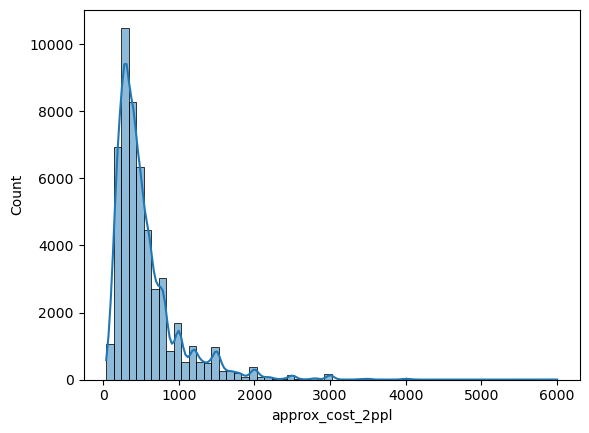

In [68]:
# Creating a categorical variable that splits the "approx_cost_2ppl" column into categories

sns.histplot(df_zomato_numeric['approx_cost_2ppl'], bins = 60, kde = True)

This histogram represents the distribution of the `approx_cost_2ppl` (approximate cost for two people) variable 

#### Interpretation

1. **Distribution Shape:**
   - The histogram shows that the distribution of `approx_cost_2ppl` is highly right-skewed. The majority of the data points are concentrated on the left side, indicating that most restaurants have a lower cost for two people.

2. **Data Concentration:**
   - The highest bar is centered around the lower cost ranges (between 0 and 1000), suggesting most restaurants fall within this pricing category.
   - Counts significantly decrease as the cost increases past this range, indicating fewer restaurants with higher costs.

3. **Outliers and Spread:**
   - Although there is a long tail extending to the right, up to about 6000, indicating a few restaurants are much more expensive, these outliers are rare.
   
4. **KDE Overlay:**
   - The KDE line smooths the distribution, providing a visual estimate of the probability density function. This makes it easier to see the overall trend and skewness in the data distribution. The KDE curve mirrors the peak and the long right tail seen in the histogram.

5. **Binning:**
   - The histogram uses 60 bins, providing a detailed view of the cost distribution and allowing for clear identification of where data points cluster most frequently.

#### Summary

Overall, this plot highlights that most restaurants in the dataset are affordable for two people, with a rapidly decreasing number of restaurants as the cost increases, culminating in a skewed distribution with potential high-cost outliers. This skewness suggests that while high-cost restaurants exist, they are much less common than more affordable ones.

In [75]:
# categorize the values in "approx_cost_2ppl" into "low", "medium", and "high" 

# Define bins and labels for categorization
bins = [0, 500, 1000, float('inf')]  
labels = ['low', 'medium', 'high']

# Create a new column with the categorized cost levels
df_zomato_numeric['cost_category'] = pd.cut(df_zomato_numeric['approx_cost_2ppl'], bins=bins, labels=labels)

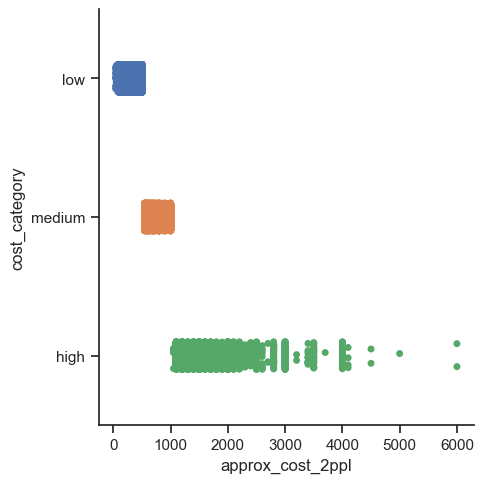

In [85]:
# Create a categorical plot in seaborn using the cost categories created above

# Set seaborn style
sns.set(style="ticks")

# Create a categorical count plot
g = sns.catplot(x="approx_cost_2ppl", y="cost_category", hue="cost_category", data=df_zomato_numeric)

This categorical plot provides a visual overview of how the `approx_cost_2ppl` values are distributed across the defined categories "low," "medium," and "high." 

#### Interpretation

1. **Categorization Logic:**
   - The `approx_cost_2ppl` values are categorized into three groups using defined bins: `[0, 500]`, `(500, 1000]`, and `(1000, ∞)`, corresponding to "low," "medium," and "high" cost categories, respectively.

2. **Understanding the Plot:**
   - **Axes:**
     - The x-axis represents the `approx_cost_2ppl`, which measures the approximate cost for two people.
     - The y-axis represents the `cost_category`, displaying the three categories: "low," "medium," and "high."

3. **Category Distribution:**
   - **"Low" Costs (Blue):** Many data points fall into this category, indicating a considerable segment of restaurants have very low costs (up to 500).
   - **"Medium" Costs (Orange):** A smaller number of data points fit within this category, representing mid-range costs (between 500 and 1000).
   - **"High" Costs (Green):** Many points here display a broad extension along the x-axis, indicating a wide range of costs above 1000 and highlighting a considerable number of higher-cost restaurants.

4. **Visualization Insights:**
   - The density of points is highest for "low" cost categories, highlighting that most restaurants fall under this budget segment.
   - The "high" category is widespread along the x-axis, covering a broad range of costs, suggesting significant variability in high-cost restaurant pricing.
   - The distribution of the "medium" cost category is notably sparse in comparison to "low" and "high."

#### Summary

Overall, this plot provides a clear categorization of the dining costs into distinct levels. It reflects a common market scenario where affordable dining options are prevalent, with fewer mid-range establishments, and highlights the variability associated with higher-cost venues. This pattern might help in understanding consumer preferences or restaurant market positioning.

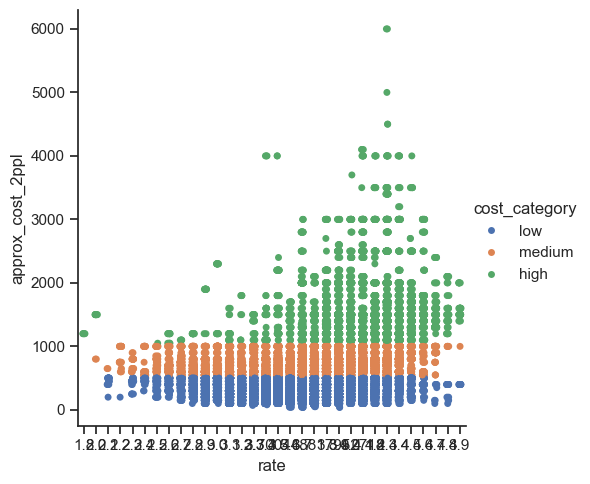

In [107]:
# Create a categorical plot in seaborn using the cost categories created above

# Set seaborn style
sns.set(style="ticks")

# Create a categorical count plot
g = sns.catplot(x="rate", y="approx_cost_2ppl", hue="cost_category", data=df_zomato_numeric)

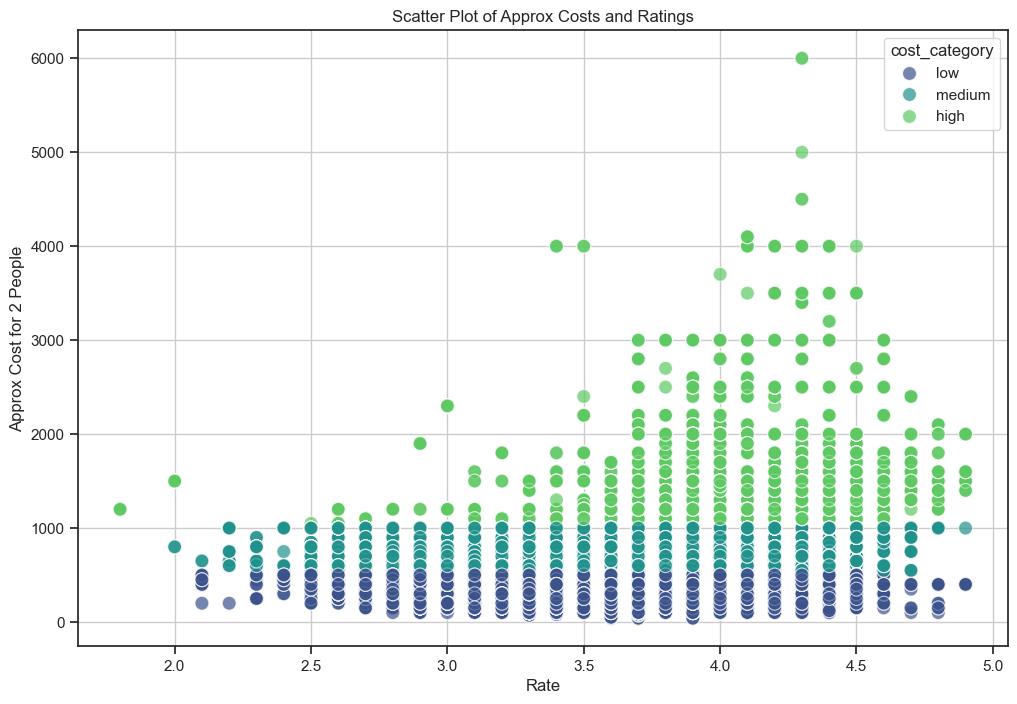

In [113]:
# Set seaborn style
sns.set(style="ticks")

# Create a categorical scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_zomato_numeric, x='rate', y='approx_cost_2ppl', hue='cost_category',
palette="viridis", s=100, alpha=0.7)

# Rotate x-axis labels
plt.xticks(rotation=0)

# Optionally, you can adjust x-ticks frequency or limits if needed
plt.locator_params(axis='x', nbins=10)

# Label the axes and add a title
plt.xlabel("Rate")
plt.ylabel("Approx Cost for 2 People")
plt.title("Scatter Plot of Approx Costs and Ratings")

# Show the plot
plt.grid(True)
plt.show()

This scatter plot provides a visual representation of the relationship between restaurant ratings (x-axis) and approximate costs for two people (y-axis), with data points categorized as "low," "medium," and "high" cost categories

#### Interpretation

1. **Axes Information:**
   - **X-axis (Rate):** Displays restaurant ratings, typically ranging from 2.0 to 5.0.
   - **Y-axis (Approx Cost for 2 People):** Shows the approximate cost for dining, ranging up to 6000.

2. **Color-Coded Categories:**
   - **'Low' Cost (Blue):** Represents restaurants with approximate costs up to 500. Points are densely concentrated near the y-axis bottom, indicating a significant number of low-cost options available across various ratings.
   - **'Medium' Cost (Medium Green):** Represents costs between 500 and 1000. These points are observed extending slightly upwards, though not as high in density as low-cost points, showing fewer medium-cost dining options.
   - **'High' Cost (Dark Green):** Represents costs above 1000. These points extend widely across higher y-values, showcasing a broader spectrum of pricing within the high-cost category and their distribution across various ratings, especially from 3.0 upwards.

3. **Patterns and Insights:**
   - **Concentration:** There is a significant concentration of data points at lower cost levels, indicating that despite the diversity in ratings, many affordable dining options are available.
   - **High-Category Spread:** High-cost restaurants exist across almost all rating levels but show a notable increase in density from ratings around 3.0 and upward, suggesting that more expensive dining options often receive higher ratings.
   - **Cost vs. Rating Relationship:** Notably, although low-cost restaurants cover a broad rating scale, high-cost restaurants tend to cluster at higher rating values, perhaps indicating a correlation between higher costs and better ratings.

4. **Implications:**
   - The plot provides valuable insights for stakeholders such as restaurant owners, marketers, and consumers by highlighting typical cost categories at various rating levels.
   - For consumers, it indicates a copious availability of low-cost dining options despite varying ratings, while high-cost restaurants frequently carry higher ratings, potentially implying perceived higher quality.

#### Summary

Overall, this scatter plot is effective in illustrating not only the distribution of costs and ratings but also how these dimensions interact across different restaurant pricing categories, offering actionable insights concerning consumer choice and market positioning.

# 5. Questions & Answers

#### 5.3.2. How does pricing correlate with customer ratings and votes?

**Votes vs Cost:**
Restaurants receiving more votes tend to have slightly higher prices, although this relationship is not exceptionally strong. Most restaurants are affordable and receive between low and moderate vote totals, suggesting diverse factors influencing voting beyond just cost.

**Ratings vs Cost:**
Although higher-rated restaurants tend to have slightly higher costs for two people, the relationship is not strong. Many other factors likely influence the pricing of a restaurant, and the correlation between rating and cost is only a small part of the picture.

**Summary:**
All variables "rate", "votes", "approx_cost_2ppl" exhibit some level of positive correlation with each other, indicating that higher ratings, votes, and costs are somewhat interconnected.

While there are positive associations between the variables, they vary in strength and are affected by the presence of outliers and skewed distributions.

 #### 5.5.1. How do restaurants with higher ratings perform in terms of votes? 

#### 5.5.2. Are there restaurants with high ratings but low votes? 

While there is a general positive relationship between the number of votes a restaurant receives and its rating, the scatter and few outliers indicate that this relationship is not perfect and other factors may influence voting behavior.

# 6. Hypotheses

No further research questions defined at this point

# 7. Exporting Data

In [137]:
# save out numeric subset for later
df_zomato_numeric.to_csv(os.path.join(r'/Users/.../Documents/Zomato Analysis/02 - Data/Prepared Data/zomato_numeric.csv'))